<a href="https://colab.research.google.com/github/KhadijaZaman/NewClass/blob/main/Assignment_1_Deep_Learning_%5BDec_29th%2C_2024%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Deep Learning Assignment - Obsesity Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Step 1: Check the Structure of the Dataset**



In [ ]:
import pandas as pd  # Import pandas, a library for handling data

# Load the dataset
file_path = '/content/ObesityDataSet (1).csv'
data = pd.read_csv(file_path)

# Display the first 5 rows to understand the structure
print(data.head())


   Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        

In [ ]:
#Code to Examine the Dataset

# Display column names and data types
print(data.info())

# Show summary statistics for numerical columns
print(data.describe())

# Display the first few rows to see examples
print(data.head())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
# Check for missing values in each column
print(data.isnull().sum())


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [ ]:
# Check for incorrect values
print(data[data['Age'] <= 0])  # Check if Age is less than or equal to zero
print(data[data['Height'] <= 0])  # Check if Height is less than or equal to zero
print(data[data['Weight'] <= 0])  # Check if Weight is less than or equal to zero


Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []
Empty DataFrame
Columns: [Gender, Age, Height, Weight, family_history_with_overweight, FAVC, FCVC, NCP, CAEC, SMOKE, CH2O, SCC, FAF, TUE, CALC, MTRANS, NObeyesdad]
Index: []


**Step #1: Redoing for Summary and Own Understanding**

In [ ]:
# Step 1: Load the Dataset
import pandas as pd  # Pandas is used for data manipulation

# Load the dataset
file_path = "/content/ObesityDataSet (1).csv"  # Replace with the path to your uploaded dataset
data = pd.read_csv(file_path)

# Check the structure of the dataset
print("Dataset Information:")
print(data.info())  # Provides a summary of the dataset

# Display the first few rows of the dataset
print("\nFirst 5 Rows of the Dataset:")
print(data.head())

# Check for missing values in the dataset
print("\nMissing Values in Each Column:")
print(data.isnull().sum())


Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF          

**Step 2: Exploratory Data Analysis (EDA)**

1. Distribution of Obesity Levels

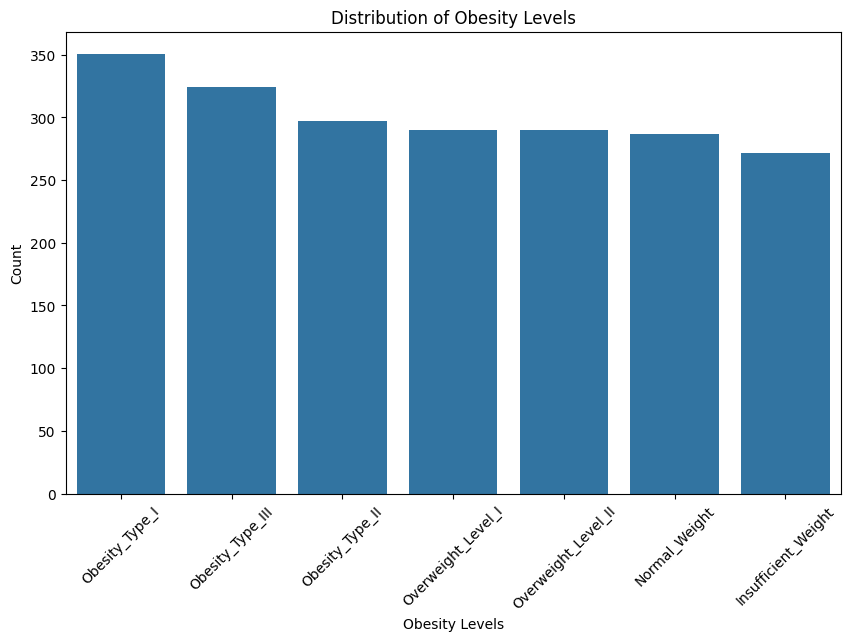

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count plot for obesity levels
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', data=data, order=data['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Distribution of Obesity Levels")
plt.xlabel("Obesity Levels")
plt.ylabel("Count")
plt.show()


2. Impact of Age on Obesity Levels

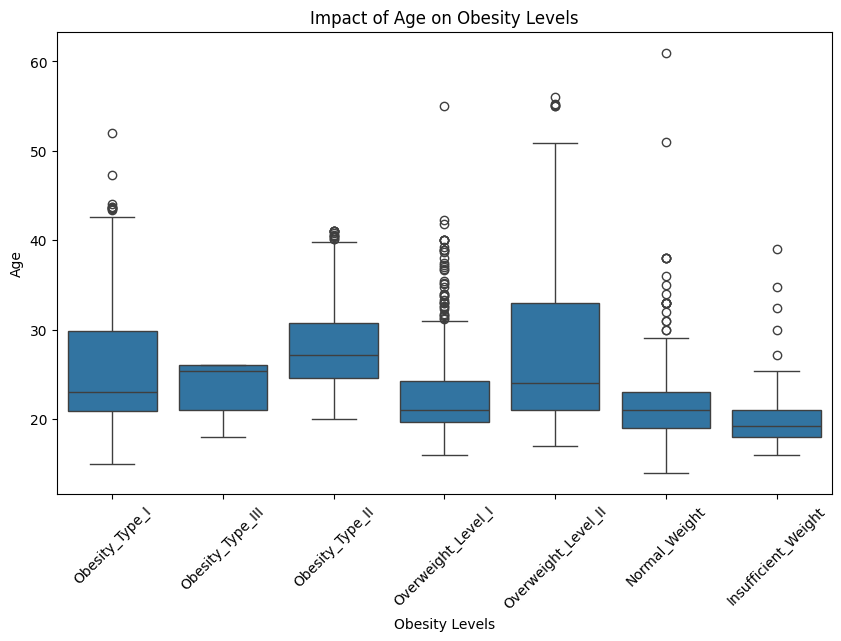

In [ ]:
# Box plot for Age vs Obesity Levels
plt.figure(figsize=(10, 6))
sns.boxplot(x='NObeyesdad', y='Age', data=data, order=data['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Impact of Age on Obesity Levels")
plt.xlabel("Obesity Levels")
plt.ylabel("Age")
plt.show()


3. Relationship Between Physical Activity Frequency and Obesity

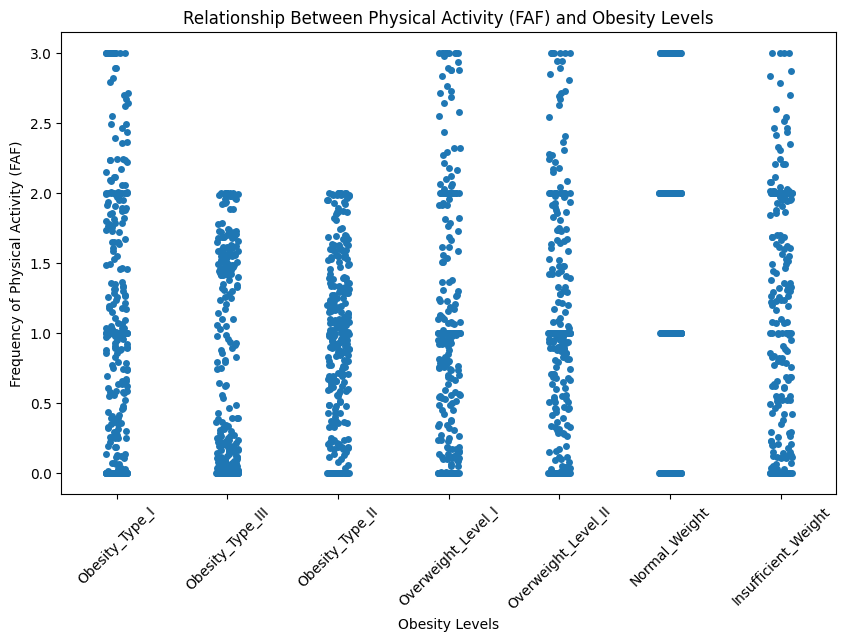

In [ ]:
# Scatter plot for Physical Activity (FAF) vs Obesity Levels
plt.figure(figsize=(10, 6))
sns.stripplot(x='NObeyesdad', y='FAF', data=data, order=data['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Relationship Between Physical Activity (FAF) and Obesity Levels")
plt.xlabel("Obesity Levels")
plt.ylabel("Frequency of Physical Activity (FAF)")
plt.show()


4. Effect of Food Consumption on Obesity Levels

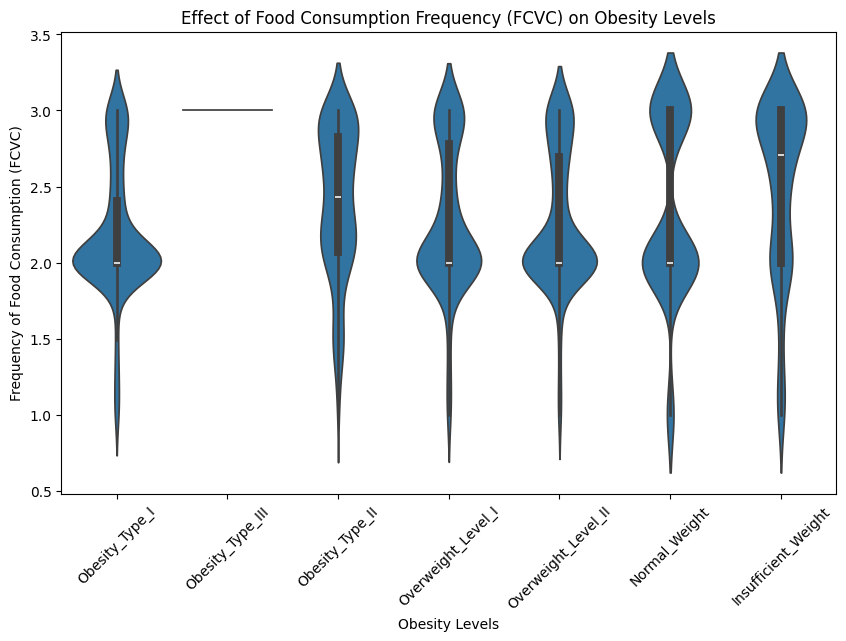

In [ ]:
# Violin plot for Food Consumption Frequency (FCVC) vs Obesity Levels
plt.figure(figsize=(10, 6))
sns.violinplot(x='NObeyesdad', y='FCVC', data=data, order=data['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Effect of Food Consumption Frequency (FCVC) on Obesity Levels")
plt.xlabel("Obesity Levels")
plt.ylabel("Frequency of Food Consumption (FCVC)")
plt.show()


5. Gender-Based Differences in Obesity Levels

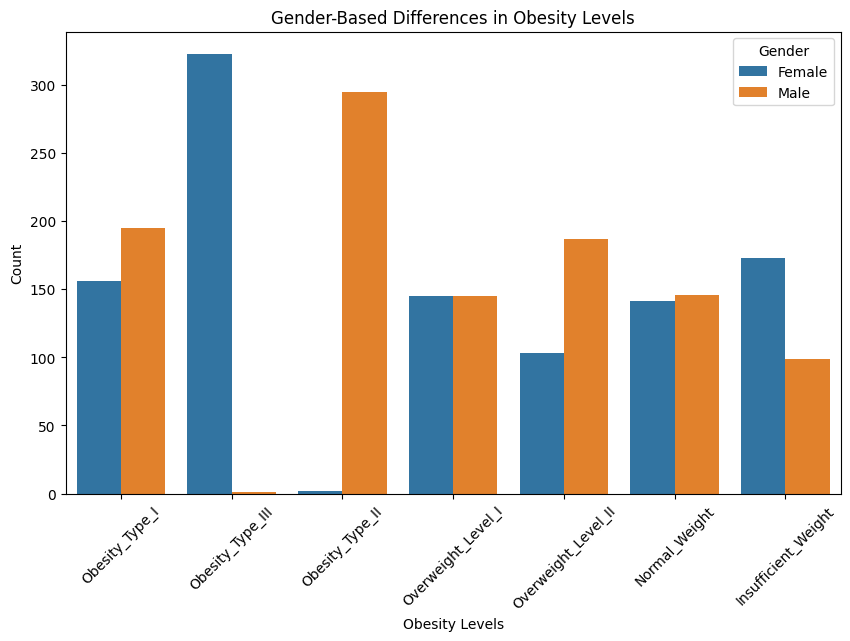

In [ ]:
# Count plot for Gender vs Obesity Levels
plt.figure(figsize=(10, 6))
sns.countplot(x='NObeyesdad', hue='Gender', data=data, order=data['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Gender-Based Differences in Obesity Levels")
plt.xlabel("Obesity Levels")
plt.ylabel("Count")
plt.legend(title="Gender")
plt.show()


**Step 3: Prepare Data for Training**

1. Split the Dataset into Features and Target

In [ ]:
# Separate features (X) and target (y)
X = data.drop(columns=['NObeyesdad'])  # All columns except the target
y = data['NObeyesdad']  # Target column


2. Encode Categorical Data

In [ ]:
from sklearn.preprocessing import LabelEncoder

# Encode the target variable
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# One-hot encode categorical features in X
X_encoded = pd.get_dummies(X, drop_first=True)


3. Normalize Numerical Features

In [ ]:
from sklearn.preprocessing import StandardScaler

# Normalize all numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_encoded)


4. Split into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.2, random_state=42)


**Step 4: Build the Neural Network Model**


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Initialize the Sequential model
model = Sequential()

# Add input and hidden layers
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))  # First hidden layer
model.add(Dense(32, activation='relu'))  # Second hidden layer

# Add the output layer
model.add(Dense(len(set(y_train)), activation='softmax'))  # Output layer for multi-class classification

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Display the model summary
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                      │ (None, 64)                  │           1,536 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 7)                   │             231 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,847 (15.03 KB)

 Trainable params: 3,847 (15.03 KB)

 Non-trainable params: 0 (0.00 B)

**Step 5: Train the Neural Network**

Code to Train the Model

In [ ]:
# Train the model
history = model.fit(X_train, y_train,  # Training data
                    validation_data=(X_test, y_test),  # Validation data
                    epochs=50,  # Number of epochs
                    batch_size=32,  # Batch size
                    verbose=1)  # Display progress


Epoch 1/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.2043 - loss: 1.8764 - val_accuracy: 0.4515 - val_loss: 1.4602
Epoch 2/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4949 - loss: 1.3547 - val_accuracy: 0.6383 - val_loss: 1.1122
Epoch 3/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6778 - loss: 1.0195 - val_accuracy: 0.7187 - val_loss: 0.9052
Epoch 4/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7247 - loss: 0.8424 - val_accuracy: 0.7423 - val_loss: 0.7799
Epoch 5/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7584 - loss: 0.7109 - val_accuracy: 0.7707 - val_loss: 0.6932
Epoch 6/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7876 - loss: 0.6256 - val_accuracy: 0.8109 - val_loss: 0.6123
Epoch 7/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8237 - loss: 0.5285 - val_accuracy: 0.8227 - val_loss: 0.5493
Epoch 8/50
53/53 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8524 - loss: 0.4832 - val_accuracy: 0.8463 - val_loss:

Code to Visualize Training and Validation Performance

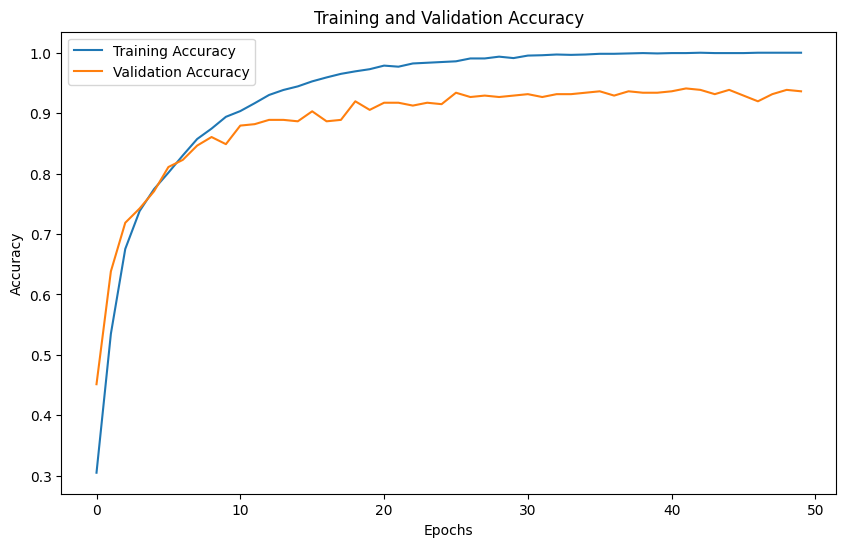

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


Plot Training and Validation Loss

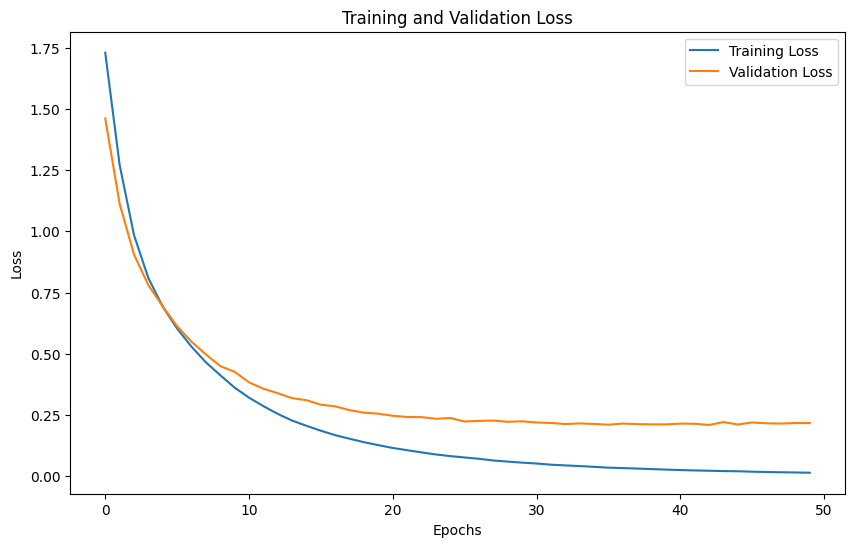

In [ ]:
# Plot training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Evaluate Code

In [ ]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=1)

# Print the results
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9431 - loss: 0.2161 
Test Loss: 0.21716423332691193
Test Accuracy: 0.936170220375061


**Step 7: Discuss the Outcomes and Reflect on Model Performance**

**Summary of Outcomes and Reflections** [Had to do a bit of GPT to make sense]


The neural network achieved a test accuracy of 93.6%, demonstrating strong performance in predicting obesity levels. The training and validation accuracies were closely aligned, and the loss steadily decreased, indicating effective learning without overfitting. The model architecture, with two hidden layers of 64 and 32 neurons, worked well for this task, and the preprocessing steps, such as encoding categorical features and scaling numerical ones, ensured the data was well-prepared. While the results are promising, improvements can be made by experimenting with hyperparameters like learning rate and batch size or modifying the architecture by adding more neurons or dropout layers to prevent overfitting. Additionally, balancing the dataset by adding more samples in underrepresented classes could further enhance the model's ability to generalize. Overall, this assignment highlighted the importance of careful preprocessing, architecture selection, and performance evaluation in building effective neural networks.

